<a href="https://colab.research.google.com/github/abeenoch/abe/blob/hamoyemain/deeplearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

# New Section

In [21]:
#loading data
mnist = keras.datasets.mnist
(train_images,train_labels),(test_images,test_labels)=mnist.load_data()

In [22]:
#examining datasets
print("Training data:{},{}".format(train_images.shape,train_labels.shape))
print("Test data:{},{}".format(test_images.shape,test_labels.shape))

Training data:(60000, 28, 28),(60000,)
Test data:(10000, 28, 28),(10000,)


In [23]:
class_labels = np.unique(train_labels)

print("There are {} classes in the dataset. They are:{}".format(len(class_labels),class_labels))

There are 10 classes in the dataset. They are:[0 1 2 3 4 5 6 7 8 9]


Text(0.5, 1.0, 'Label:5')

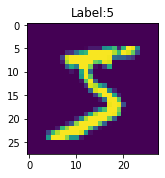

In [24]:
#plot a few images
plt.figure(figsize=(8,5))
plt.subplot(1,3,1)
plt.imshow(train_images[0])
plt.title("Label:{}".format(train_labels[0]))

<function matplotlib.pyplot.show>

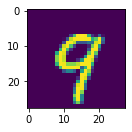

In [25]:
plt.subplot(1,3,3)
plt.imshow(test_images[12])
plt.show

In [26]:
#data processing
#scale dataset to range btw 0 and 1
#normalization is carried out
train_images=train_images/255.0
test_images=test_images/255.0

In [27]:
#partition data set to create validation dataset
#i.e training set is used to fit parameters while validation set is used to finetune the parameters while the trained classifier is evaluated on the test set
x_train=train_images[0:50000]
x_val=train_images[50000:]
y_train=train_labels[0:50000]
y_val=train_labels[50000:]
print("x_train:{}".format(x_train.shape))
print("x_val:{}".format(x_val.shape))
print("y_train:{}".format(y_train.shape))
print("y_val:{}".format(y_val.shape))

x_train:(50000, 28, 28)
x_val:(10000, 28, 28)
y_train:(50000,)
y_val:(10000,)


In [28]:
#we one hot encode the categorical column
#it will be a row vector and for each image,it will have a dimension of 1 x 10
from tensorflow.keras.utils import to_categorical
no_labels=10
y_train=to_categorical(y_train,no_labels)
y_val=to_categorical(y_val,no_labels)
y_test=to_categorical(test_labels,no_labels)

In [29]:
#flattening the images from the 2d 28 x 28 pixels to 1d 784 pixels
new_dimension=np.prod(train_images.shape[1:])
x_train=x_train.reshape(x_train.shape[0],new_dimension)
x_val=x_val.reshape(x_val.shape[0],new_dimension)
test_images=test_images.reshape(test_images.shape[0],new_dimension)

In [43]:
#define input placeholder X with dimension of 784,placeholder is a variable that we will assign data to at a later date 
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
X=tf.placeholder(tf.float32,[None,new_dimension])
Y=tf.placeholder(tf.float32,[None,no_labels])

In [38]:
#BUILDING MODEL ARCHITECTURE
def multilayer_perceptron(x,no_classes,first_layer_neurons=256,second_layer_neurons=128):
  #first layer
  first_weight=tf.Variable(tf.random_uniform([new_dimension,first_layer_neurons]))
  first_bias=tf.Variable(tf.zeros([first_layer_neurons]))
  first_layer_output=tf.nn.relu(tf.add(tf.matmul(x,first_weight),first_bias))

  #second layer
  second_weight=tf.Variable(tf.random_uniform([first_layer_neurons,second_layer_neurons]))
  second_bias=tf.Variables(tf.zeros([second_layer_neurons]))
  second_layer_output=tf.nn.relu(tf.add(tf.matmul(first_layer_output,second_weight),second_bias))

  #output layer
  final_weight=tf.Variable(tf.random_uniform([second_layer_neurons,no_classes]))
  final_bias=tf.Variable(tf.zeros([no_classes]))
  logits=tf.add(tf.matmul(second_layer_output,final_weight),final_bias)


  return logits

In [44]:

logits=multilayer_perceptron(X,no_labels)
learning_rate=0.01
loss_op=tf.reduce_mean(tf.nn.softmax_cross_enthropy_with_logits(logits=logits,labels=Y))
optimiser=tf.train.AdamOptimizer(learning_rate=learning_rate)
train_op=optimiser.minimize(loss_op)

AttributeError: ignored

In [ ]:
init=tf.global_variables_initializer()

epochs = 20 
batch_size = 1000